In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
ra=pd.read_excel(r"C:\Users\Maharshi Goswami\OneDrive\Documents\Alliance Datascience project\Road Accident Data.xlsx")
ra.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [3]:
ra.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64

In [4]:
ra["Carriageway_Hazards"].unique()[:10]

array([nan, 'Pedestrian in carriageway - not injured',
       'Other object on road',
       'Any animal in carriageway (except ridden horse)',
       'Previous accident', 'Vehicle load on road'], dtype=object)

### Carriageway_Hazards column has categorical column, i cannot apply IQR to fix outliers

#### we cannot use ML model on "" because missing % is too large, ML model will be weak or biased & it will mostly predict "No Hazard"

#### we generally take ML model when missing value is <=30% 

In [5]:
# we will replace nan value with "No Hazard" or "unknown"
ra["Carriageway_Hazards"].fillna("No Hazard", inplace = True)

In [6]:
ra["Carriageway_Hazards"].unique()[:10]

array(['No Hazard', 'Pedestrian in carriageway - not injured',
       'Other object on road',
       'Any animal in carriageway (except ridden horse)',
       'Previous accident', 'Vehicle load on road'], dtype=object)

In [7]:
ra["Time"].head(10)

0    15:11:00
1    10:59:00
2    14:19:00
3    08:10:00
4    17:25:00
5    11:48:00
6    13:58:00
7    13:18:00
8    12:15:00
9    09:52:00
Name: Time, dtype: object

In [8]:
ra["Time"]=pd.to_datetime(ra["Time"], format="%H:%M:%S", errors="coerce")

In [9]:
ra.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,No Hazard,...,1,2,Metropolitan Police,Dry,One way street,30,1900-01-01 15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,No Hazard,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,1900-01-01 10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,No Hazard,...,1,2,Metropolitan Police,Dry,Single carriageway,30,1900-01-01 14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,No Hazard,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,1900-01-01 08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,No Hazard,...,1,2,Metropolitan Police,Dry,Single carriageway,30,1900-01-01 17:25:00,Urban,Fine no high winds,Car


### Extracting hours and minute from time column

In [10]:
ra["Hours"]=ra["Time"].dt.hour

In [11]:
ra["Minute"]=ra["Time"].dt.minute

In [12]:
ra["Hours"].head(10)

0    15.0
1    10.0
2    14.0
3     8.0
4    17.0
5    11.0
6    13.0
7    13.0
8    12.0
9     9.0
Name: Hours, dtype: float64

In [13]:
ra=ra.drop("Time",axis=1)

In [14]:
ra.fillna(ra[["Hours","Minute"]].median(),inplace=True)

In [15]:
ra.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
Hours                         0
Minute                        0
dtype: int64

In [16]:
# Urban_or_Rural_Area : 'Rural' , 'Urban' (One hot encoding)
# Accident_Severity : 'Serious', 'Slight', 'Fetal', 'Fatal' (One hot)

In [17]:
# Day_of_week
# Weather_condition
# Road_Type
# Road_Surface_Conditions
# Carriageway_Hazards
# Light_Conditions
# junction_Detail


In [18]:
ra['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208967
Wet or damp              81796
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

In [19]:
ra["Number_of_Casualties"].unique()

array([ 1, 11,  3,  2,  4,  5,  6, 10,  8,  7,  9, 13, 12, 14, 16, 18, 15,
       19, 21, 17, 27, 48, 40, 24, 26, 22, 42, 43])

In [20]:
ra=ra[ra["Accident_Severity"]!="Fetal"] # this wll remove all the rows which was "Fetal" in "Accident_Severity" column

In [21]:
ra["Number_of_Vehicles"].head()

0    2
1    2
2    2
3    2
4    2
Name: Number_of_Vehicles, dtype: int64

### Create the Mapping Dictionary for Vehicle

In [22]:
vehicle_group_map = {
    # Group 1: Car
    'Car': 'Car',
    
    # Group 2: Motorcycle
    'Motorcycle over 500cc': 'Motorcycle',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    
    # Group 3: Goods_Vehicle
    'Van / Goods 3.5 tonnes mgw or under': 'Goods_Vehicle',
    'Goods 7.5 tonnes mgw and over': 'Goods_Vehicle',
    'Goods over 3.5t. and under 7.5t': 'Goods_Vehicle',
    
    # Group 4: Transport_Vehicle
    'Bus or coach (17 or more pass seats)': 'Transport_Vehicle',
    'Taxi/Private hire car': 'Transport_Vehicle',
    'Minibus (8 - 16 passenger seats)': 'Transport_Vehicle',
    
    # Group 5: Other_Rare
    'Other vehicle': 'Other_Rare',
    'Agricultural vehicle': 'Other_Rare',
    'Pedal cycle': 'Other_Rare',
    'Ridden horse': 'Other_Rare'
}

# Apply the Map to Create a New Column
# Create a new column 'Vehicle_Group' by applying the map

ra['Vehicle_Group'] = ra['Vehicle_Type'].map(vehicle_group_map)


print("Original categories:", ra['Vehicle_Type'].nunique())
print("New grouped categories:", ra['Vehicle_Group'].nunique())
print("\nNew Group Value Counts:")
print(ra['Vehicle_Group'].value_counts())

Original categories: 15
New grouped categories: 5

New Group Value Counts:
Vehicle_Group
Car                  239758
Motorcycle            25061
Goods_Vehicle         24723
Transport_Vehicle     15049
Other_Rare             3333
Name: count, dtype: int64


### Create the Mapping Dictionary for "Road_Surface_Conditions"

In [23]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307924 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307924 non-null  object        
 1   Accident Date               307924 non-null  datetime64[ns]
 2   Day_of_Week                 307924 non-null  object        
 3   Junction_Control            307924 non-null  object        
 4   Junction_Detail             307924 non-null  object        
 5   Accident_Severity           307924 non-null  object        
 6   Latitude                    307924 non-null  float64       
 7   Light_Conditions            307924 non-null  object        
 8   Local_Authority_(District)  307924 non-null  object        
 9   Carriageway_Hazards         307924 non-null  object        
 10  Longitude                   307924 non-null  float64       
 11  Number_of_Casualties        307924 non-null 

In [24]:
ra['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208932
Wet or damp              81782
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

In [25]:
Road_condition_group={
 'Dry':'Dry',
    'Wet or damp':'Wet or damp',
    'Frost or ice':'Snow',
    'Snow':'Snow',
    'Flood over 3cm. deep':'Flood'
}

ra['Road_Condition']=ra['Road_Surface_Conditions'].map(Road_condition_group)

print("Original categories:", ra['Road_Surface_Conditions'].nunique())
print("New grouped categories:", ra['Road_Condition'].nunique())
print("\nNew Group Value Counts:")
print(ra['Road_Condition'].value_counts())

Original categories: 5
New grouped categories: 4

New Group Value Counts:
Road_Condition
Dry            208932
Wet or damp     81782
Snow            16836
Flood             374
Name: count, dtype: int64


### ----------------One Hot Encoding------------------

####  Applying One hot encoding on 'Junction Detail' Column

In [26]:
jd = pd.get_dummies(ra['Junction_Detail'], prefix='JD', drop_first=True).astype(int)

# 1. Clean the new column names (replacing spaces and special characters)
jd.columns = jd.columns.str.replace(' ', '_')
jd.columns = jd.columns.str.replace('(', '', regex=False)
jd.columns = jd.columns.str.replace(')', '', regex=False)
ra=ra.join(jd)


#### Applying One hot encoding on 'Light Condition' Column

In [27]:
lc = pd.get_dummies(ra['Light_Conditions'], prefix='LC', drop_first=True).astype(int)

# 2. Clean the new column names
#    We will replace spaces and the '-' character with an underscore '_'
lc.columns = lc.columns.str.replace(' - ', '_', regex=False)
lc.columns = lc.columns.str.replace(' ', '_', regex=False)

# 3. Merge new column
ra=ra.join(lc)
# 4. View the new columns
print(ra.info())

<class 'pandas.core.frame.DataFrame'>
Index: 307924 entries, 0 to 307972
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Accident_Index                          307924 non-null  object        
 1   Accident Date                           307924 non-null  datetime64[ns]
 2   Day_of_Week                             307924 non-null  object        
 3   Junction_Control                        307924 non-null  object        
 4   Junction_Detail                         307924 non-null  object        
 5   Accident_Severity                       307924 non-null  object        
 6   Latitude                                307924 non-null  float64       
 7   Light_Conditions                        307924 non-null  object        
 8   Local_Authority_(District)              307924 non-null  object        
 9   Carriageway_Hazards                     30

#### Applying One hot encoding on 'Road_Type' column

In [28]:
# 1. One-hot encode the column. 'RT' is a prefix for 'Road_Type'.
rt = pd.get_dummies(ra['Road_Type'], prefix='RT', drop_first=True).astype(int)

# 2. Clean the new column names (replace spaces with underscores)
rt.columns = rt.columns.str.replace(' ', '_', regex=False)

# 3. Merging
ra=ra.join(rt)


#### Encoding 'Day_of_weeks' column

In [29]:
dw=pd.get_dummies(ra["Day_of_Week"],prefix="DoW",drop_first=True).astype(int)

# 1. Clean the new column names (replace spaces with underscores)
dw.columns = dw.columns.str.replace(' ', '_', regex=False)

# 2. Merging
ra=ra.join(dw)

#### Seperating wind details from 'weather_Conditions' column

In [30]:
# Creating a new column: 1 if 'high winds' is in the string, 0 otherwise
ra['High_Wind'] = ra['Weather_Conditions'].str.contains('high winds', case=False).astype(int)

# Remove the wind-related text
ra['Condition'] = ra['Weather_Conditions'].str.replace(' \+ high winds', '', regex=True)
ra['Condition'] = ra['Condition'].str.replace(' no high winds', '', regex=True) 
# Now 'Condition' will just have ['Fine', 'Other', 'Raining', 'Snowing', 'Fog or mist']

In [31]:
# One-hot encode the new 'Condition' column
c = pd.get_dummies(ra['Condition'], prefix='Weather',drop_first=True).astype(int)

# merging columns
ra=ra.join(c)

In [32]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307924 entries, 0 to 307972
Data columns (total 52 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Accident_Index                          307924 non-null  object        
 1   Accident Date                           307924 non-null  datetime64[ns]
 2   Day_of_Week                             307924 non-null  object        
 3   Junction_Control                        307924 non-null  object        
 4   Junction_Detail                         307924 non-null  object        
 5   Accident_Severity                       307924 non-null  object        
 6   Latitude                                307924 non-null  float64       
 7   Light_Conditions                        307924 non-null  object        
 8   Local_Authority_(District)              307924 non-null  object        
 9   Carriageway_Hazards                     30

In [33]:
ra[["Condition","Road_Condition","Weather_Conditions"]].head()

,Condition,Road_Condition,Weather_Conditions
0,Fine,Dry,Fine no high winds
1,Fine,Wet or damp,Fine no high winds
2,Fine,Dry,Fine no high winds
3,Other,Snow,Other
4,Fine,Dry,Fine no high winds


In [34]:
ra.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,DoW_Sunday,DoW_Thursday,DoW_Tuesday,DoW_Wednesday,High_Wind,Condition,Weather_Fog or mist,Weather_Other,Weather_Raining,Weather_Snowing
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,No Hazard,...,0,1,0,0,1,Fine,0,0,0,0
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,No Hazard,...,0,0,0,0,1,Fine,0,0,0,0
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,No Hazard,...,1,0,0,0,1,Fine,0,0,0,0
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,No Hazard,...,0,0,0,0,0,Other,0,1,0,0
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,No Hazard,...,0,0,1,0,1,Fine,0,0,0,0


### Applying One Hot Encoding on "Vehicle_Group" column

In [35]:
vgroup=pd.get_dummies(ra["Vehicle_Group"],prefix="vg",drop_first=True).astype(int)
ra=ra.join(vgroup)

### Applying One Hot Encoding on "Carriageway_Hazards" column

In [36]:
CH_encoded= pd.get_dummies(ra['Carriageway_Hazards'],prefix="CH", drop_first=True).astype(int)
ra=ra.join(CH_encoded)

### -----------------Ordinal Encoding--------------------

In [37]:
Severity_map={
"Slight":1,
"Serious":2,
"Fatal":3
}
ra["Accident_Severity_Encoded"]=ra["Accident_Severity"].map(Severity_map)

print("Accident_Severity Vs. Accident_Severity_Encoded")
print(ra[["Accident_Severity","Accident_Severity_Encoded"]].head())


Accident_Severity Vs. Accident_Severity_Encoded
  Accident_Severity  Accident_Severity_Encoded
0           Serious                          2
1           Serious                          2
2            Slight                          1
3           Serious                          2
4           Serious                          2


## Analysis

#### 1. What is the distribution of accident severity?

Plotting distribution from 'Accident_Severity_Encoded' column


[Text(0, 0, '1 (Slight)'), Text(1, 0, '2 (Serious)'), Text(2, 0, '3 (Fatal)')]

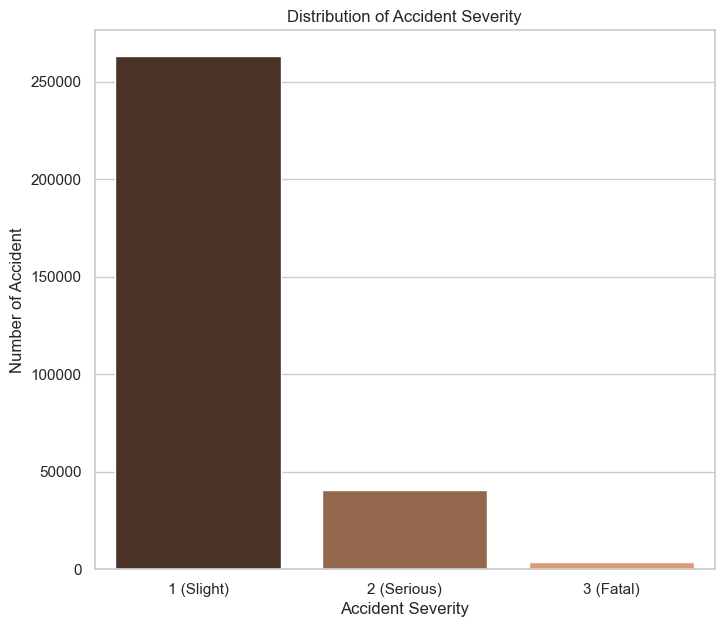

In [38]:

plt.figure(figsize=[8,7])
print("Plotting distribution from 'Accident_Severity_Encoded' column")
ax=sns.countplot(data=ra, x='Accident_Severity_Encoded',order=[1,2,3],palette="copper")
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accident')

ax.set_xticklabels(['1 (Slight)', '2 (Serious)', '3 (Fatal)'])

#### 2. At what hour of the day do most accidents occur?


Accidents by Hour of the Day:
Hours
0.0      4666
1.0      3533
2.0      2652
3.0      2311
4.0      1720
5.0      2491
6.0      5271
7.0     12560
8.0     22548
9.0     15554
10.0    13790
11.0    16141
12.0    18340
13.0    18965
14.0    19083
15.0    24150
16.0    24899
17.0    26960
18.0    21060
19.0    15847
20.0    11400
21.0     9440
22.0     8143
23.0     6400
Name: count, dtype: int64


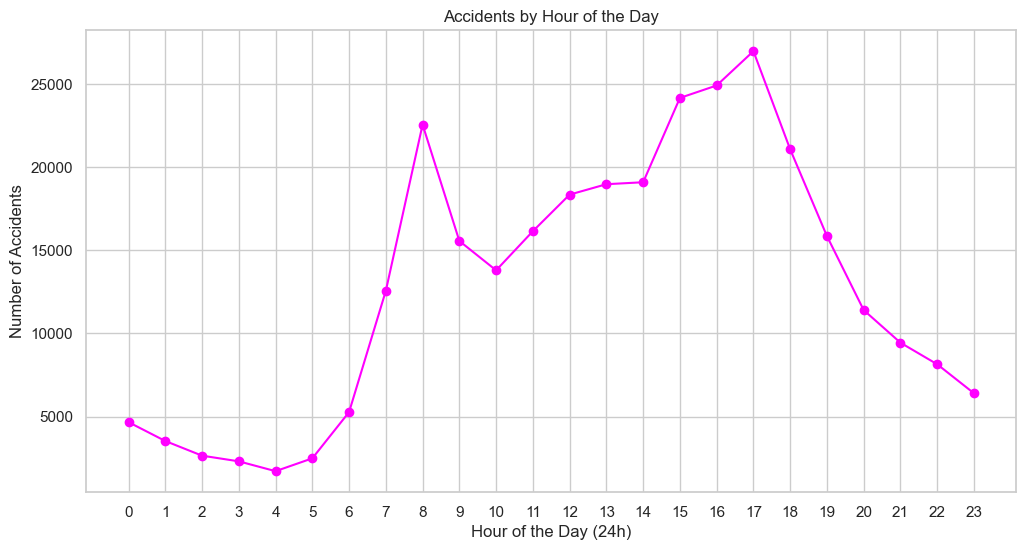

In [39]:
hourly_accidents = ra['Hours'].value_counts().sort_index()
print("\nAccidents by Hour of the Day:")
print(hourly_accidents)

# Plot the trend
plt.figure(figsize=(12, 6))
hourly_accidents.plot(kind='line', marker='o',color="magenta")
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day (24h)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### 3. Which day of the week has the most accidents?

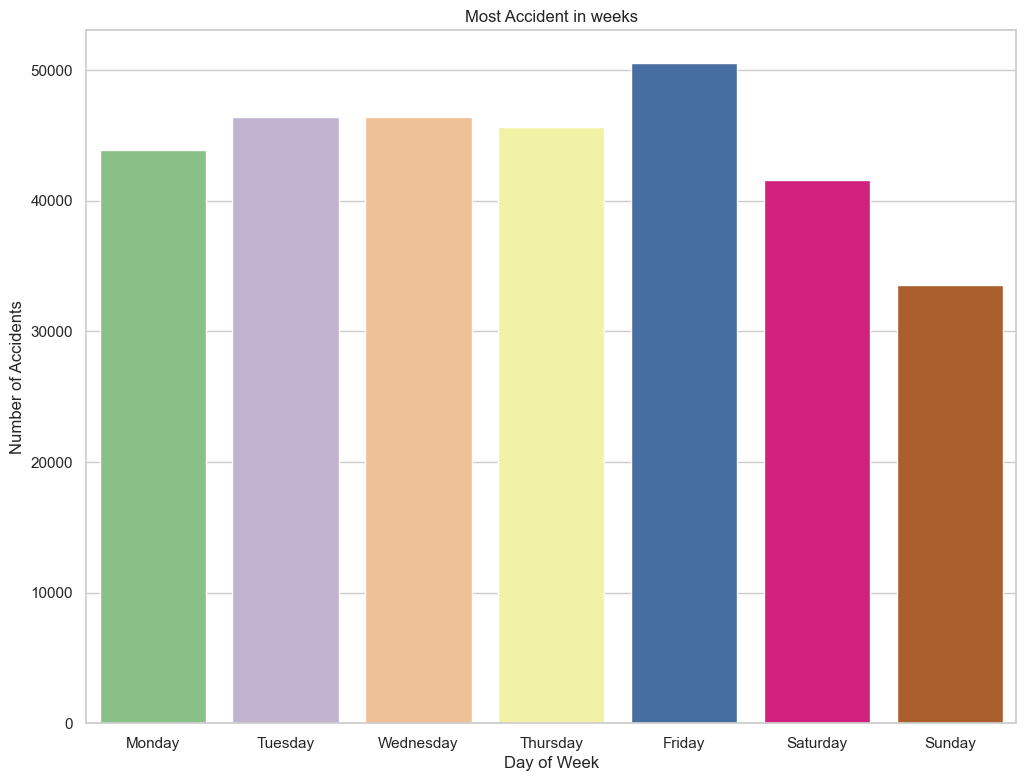

In [40]:
weeks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count=ra['Day_of_Week'].value_counts().reindex(weeks)
plt.figure(figsize=[12,9])
sns.barplot(x=weeks,y=count,order=weeks,palette="Accent")
plt.title("Most Accident in weeks")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.show()

#### 4. How do weather conditions relate to accident severity?

Weather Accident


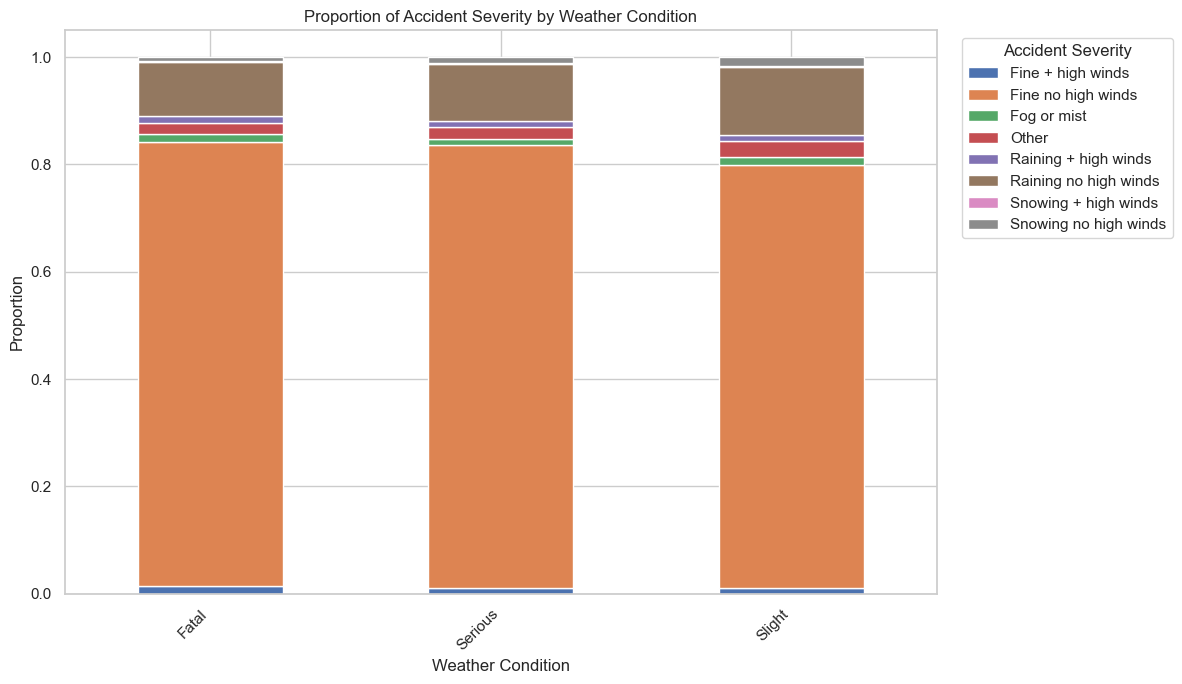

In [41]:
weather_accident=pd.crosstab(ra["Accident_Severity"],ra["Weather_Conditions"])
print("Weather Accident")

weather_severity_norm=weather_accident.div(weather_accident.sum(axis=1),axis=0)

weather_severity_norm.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Proportion of Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307924 entries, 0 to 307972
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Accident_Index                              307924 non-null  object        
 1   Accident Date                               307924 non-null  datetime64[ns]
 2   Day_of_Week                                 307924 non-null  object        
 3   Junction_Control                            307924 non-null  object        
 4   Junction_Detail                             307924 non-null  object        
 5   Accident_Severity                           307924 non-null  object        
 6   Latitude                                    307924 non-null  float64       
 7   Light_Conditions                            307924 non-null  object        
 8   Local_Authority_(District)                  307924 non-null  object        
 9 

#### 5. How does accident severity differ between urban and rural areas?


 Urban Vs. Rural:


<Figure size 1200x900 with 0 Axes>

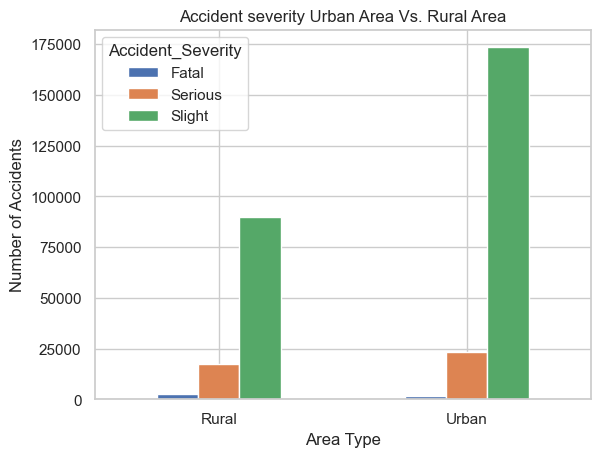

In [43]:
plt.figure(figsize=[12,9])
print("\n Urban Vs. Rural:")

ur=pd.crosstab( ra["Urban_or_Rural_Area"] ,ra["Accident_Severity"])
ur.plot(kind="bar")
plt.title("Accident severity Urban Area Vs. Rural Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

#### 6. What is the average number of casualties by speed limit?


 Average number of casualities by speed limit


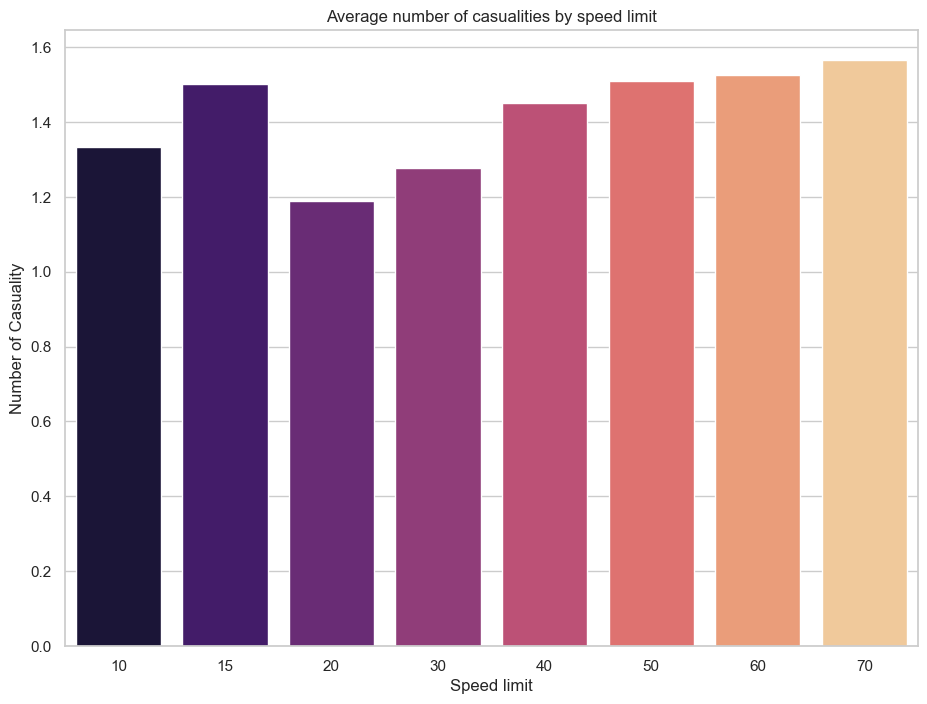

In [44]:
plt.figure(figsize=[11,8])
cas=ra.groupby('Speed_limit')['Number_of_Casualties'].mean().sort_index()
print('\n Average number of casualities by speed limit')
sns.barplot(x=cas.index,y=cas.values,palette='magma')
plt.title("Average number of casualities by speed limit")
plt.xlabel("Speed limit")
plt.ylabel("Number of Casuality")
plt.show()

## Removing unwanted columns

In [45]:
columns_to_drop = [
    "Accident_Index", "Day_of_Week", "Junction_Control", "Junction_Detail",
    "Accident_Severity", "Light_Conditions", "Local_Authority_(District)", "Carriageway_Hazards",
    "Police_Force", "Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area",
    "Weather_Conditions", "Vehicle_Type", "Vehicle_Group", "Road_Condition", "Condition"
]

ra = ra.drop(columns=columns_to_drop)

In [46]:
#--Accident Date--

# Reason: This is a datetime object, not a number. Models like Logistic Regression can only process numeric data. 
# I have already done the correct thing by extracting the useful parts of the date (Hours, Minute, DoW_... columns)
# So this original column is no longer needed.

#--Number_of_Casualties--

# Reason: This is a subtle but critical one called target leakage. 
# The Accident_Severity (Slight, Serious, Fatal) is determined by the outcome of the casualties. 
# An accident is "Fatal" because a casualty occurred. Therefore, Number_of_Casualties is more of an outcome of the event, just like severity. 
# Your goal is to predict the severity based on the conditions of the accident (like weather, speed, location), not based on the outcome itself. 
# Including it will make your model look much more accurate than it actually is.

In [47]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307924 entries, 0 to 307972
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Accident Date                               307924 non-null  datetime64[ns]
 1   Latitude                                    307924 non-null  float64       
 2   Longitude                                   307924 non-null  float64       
 3   Number_of_Casualties                        307924 non-null  int64         
 4   Number_of_Vehicles                          307924 non-null  int64         
 5   Speed_limit                                 307924 non-null  int64         
 6   Hours                                       307924 non-null  float64       
 7   Minute                                      307924 non-null  float64       
 8   JD_Mini-roundabout                          307924 non-null  int64         
 9 

## ---------Scaling Applying Logistic Regression Model----------

### Seperating x and y for training

In [48]:
y = ra['Accident_Severity_Encoded']

X = ra.drop(columns=[
    'Accident_Severity_Encoded',
    'Accident Date',       
    'Number_of_Casualties'      
])

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (307924, 42)
Shape of y (target): (307924,)


### creating a feature for scaling all features with continuous values

In [51]:
continuous_features = [
    'Latitude', 'Longitude', 'Number_of_Vehicles', 
    'Speed_limit', 'Hours', 'Minute'
]

### Model Pipeline

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), continuous_features)
    ],
    remainder='passthrough' #For columns not listed in continuous_features, don’t drop them and keep them as they are
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining the Logistic Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model trained.")



Training the Logistic Regression model...
Model trained.


### Evaluating

In [53]:
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")


Model Accuracy on Test Set: 0.8564


In [54]:
# Check for class imbalance
print("Class Distribution:")
print(y_train.value_counts(normalize=True))

Class Distribution:
Accident_Severity_Encoded
1    0.854676
2    0.132663
3    0.012661
Name: proportion, dtype: float64


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 7.1: Classification Report ---
# This shows precision, recall, and f1-score for each class
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Slight (1)', 'Serious (2)', 'Fatal (3)']))


# --- Step 7.2: Confusion Matrix ---
# This shows exactly what your model is misclassifying
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)


--- Classification Report ---
              precision    recall  f1-score   support

  Slight (1)       0.86      1.00      0.92     52740
 Serious (2)       0.00      0.00      0.00      8060
   Fatal (3)       0.00      0.00      0.00       785

    accuracy                           0.86     61585
   macro avg       0.29      0.33      0.31     61585
weighted avg       0.73      0.86      0.79     61585


--- Confusion Matrix ---
[[52740     0     0]
 [ 8060     0     0]
 [  785     0     0]]
